In [1]:
from utils.training_io import load_log
from utils.runs_experiment_drawing import get_df_from_all_logs, plot_compare_dev_loss_niter, plot_lr_dev_loss, plot_vec_grad_norm
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import os

sns.set(font_scale=1.2, style="whitegrid")

In [2]:
nb_list = ["full", "nb"]
lr_list = [1e-2, 1e-3, 1e-4, 1e-5]
all_logs = {}
for nb in nb_list:
    all_logs.setdefault(nb, {})
    for lr in  lr_list:
        all_logs[nb][lr] = load_log(f"imdb_runs_results/imdb_log_{nb}_{lr:.0e}.txt")

In [3]:
all_logs['full'][0.001].head()

,epoch,mean_dv_norm,mean_grad_norm,mean_ngram_count,mean_loss,C,dev_acc,test_acc
0,0.0,0.710768,7.905282,617.0,2.447439,1.0,77.24,78.372
1,1.0,0.727715,6.092627,617.0,2.190298,20.0,86.36,87.680
2,2.0,0.742271,5.736450,617.0,2.093341,1.0,88.96,89.812
3,3.0,0.755306,5.497184,617.0,2.040631,10.0,90.08,90.652
4,4.0,0.767264,5.321647,617.0,2.008575,20.0,90.38,91.152


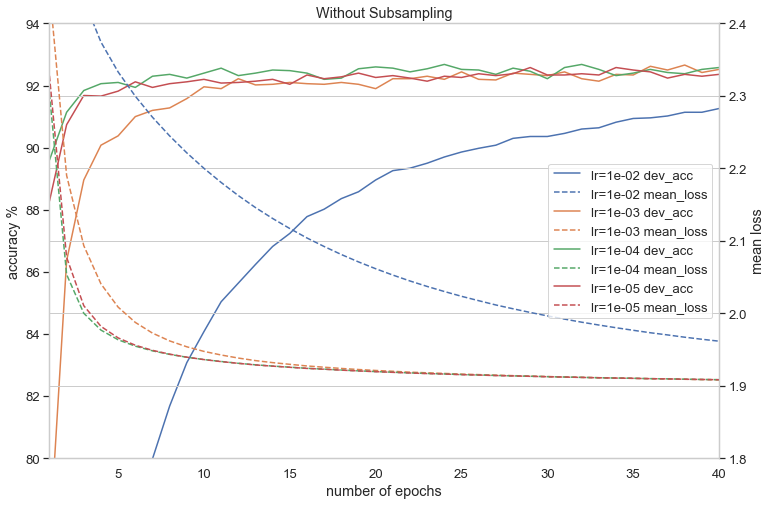

In [4]:
if not os.path.isdir("figures"): os.mkdir("figures")
plot_lr_dev_loss(all_logs["full"], list(all_logs["full"].keys()), "Without Subsampling", savedir="figures/run_full_40ep.jpg")

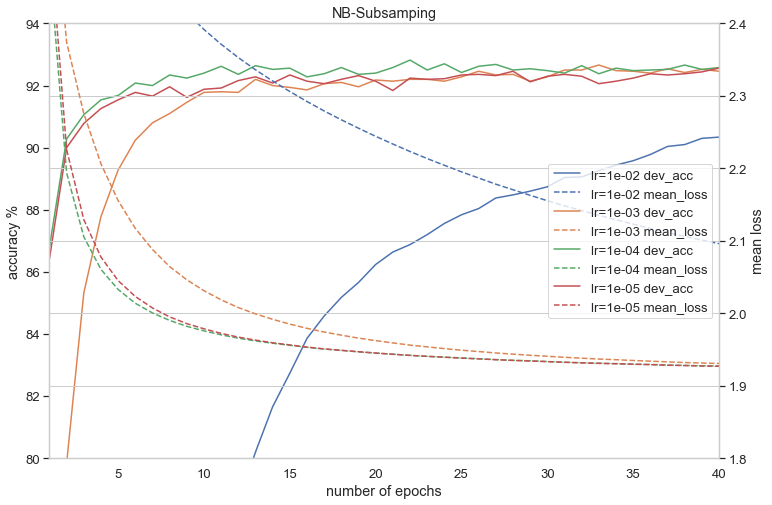

In [5]:
plot_lr_dev_loss(all_logs["nb"], list(all_logs["nb"].keys()), "NB-Subsamping", savedir="figures/run_nb_40ep.jpg")

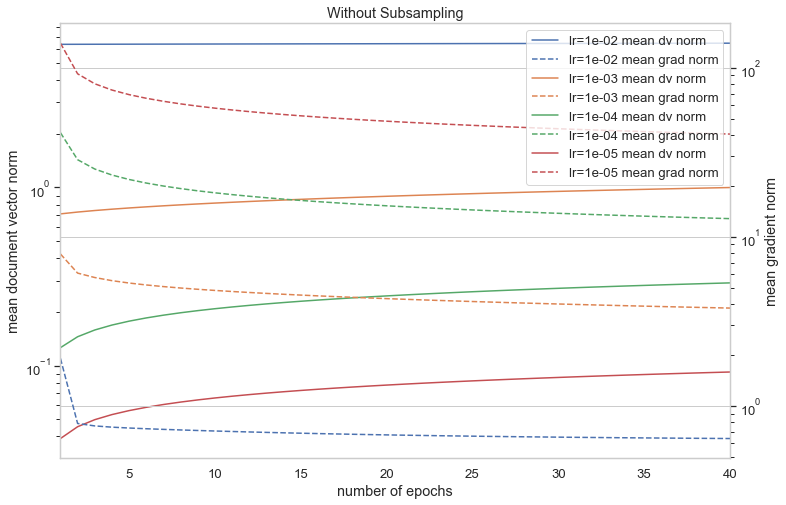

In [6]:
plot_vec_grad_norm(all_logs["full"], list(all_logs["full"].keys()), "Without Subsampling", savedir="figures/dvgrad_full_40ep.jpg")

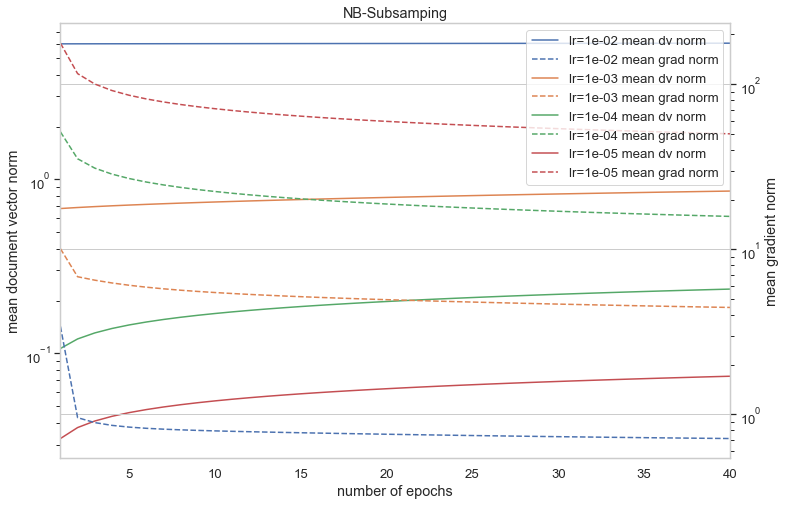

In [7]:
plot_vec_grad_norm(all_logs["nb"], list(all_logs["nb"].keys()), "NB-Subsamping", savedir="figures/dvgrad_nb_40ep.jpg")

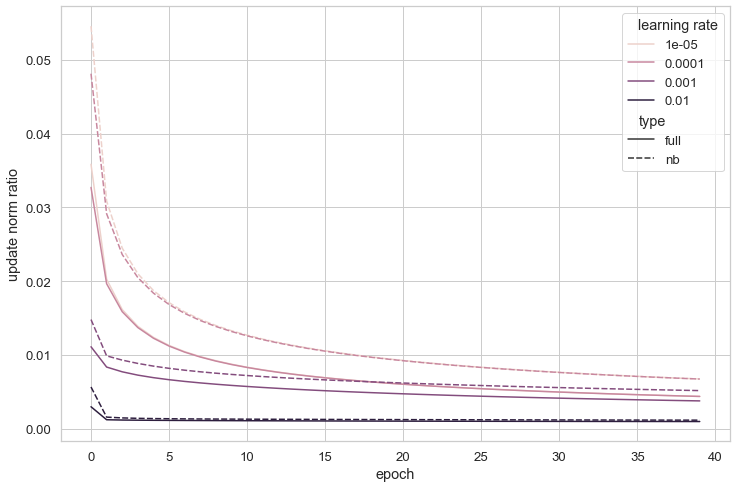

In [8]:
columns = ["epoch", "mean_dv_norm", "mean_grad_norm"]
df1 = get_df_from_all_logs(all_logs, columns)
df1["update norm ratio"] = df1.mean_grad_norm * df1["learning rate"] / df1.mean_dv_norm
df1["DV norm x grad norm"] = df1.mean_grad_norm * df1.mean_dv_norm
f, ax = plt.subplots(figsize=(12, 8))
g = sns.lineplot(x="epoch", y="update norm ratio", hue="learning rate", style="type", data=df1, hue_norm=LogNorm(1e-5, 1e-2), legend='full', ax=ax)
f.savefig("figures/epoch_norm_ratio.jpg")

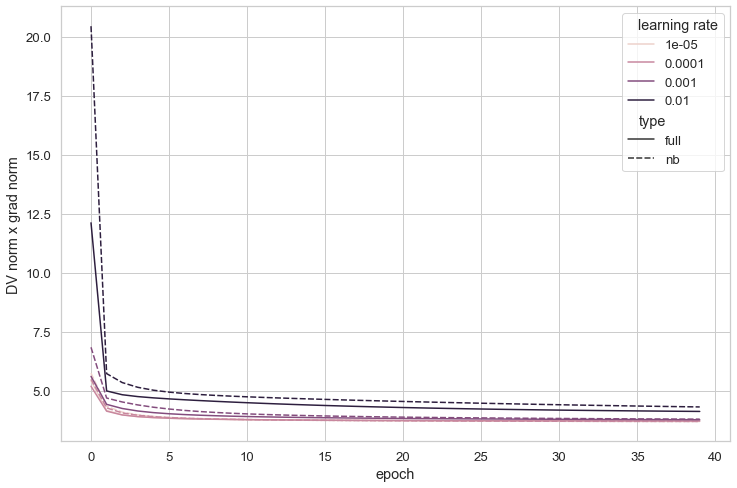

In [9]:
f, ax = plt.subplots(figsize=(12, 8))
g = sns.lineplot(x="epoch", y="DV norm x grad norm", hue="learning rate", style="type", data=df1, hue_norm=LogNorm(1e-5, 1e-2), legend='full', ax=ax)
f.savefig("figures/norm_prod.jpg")

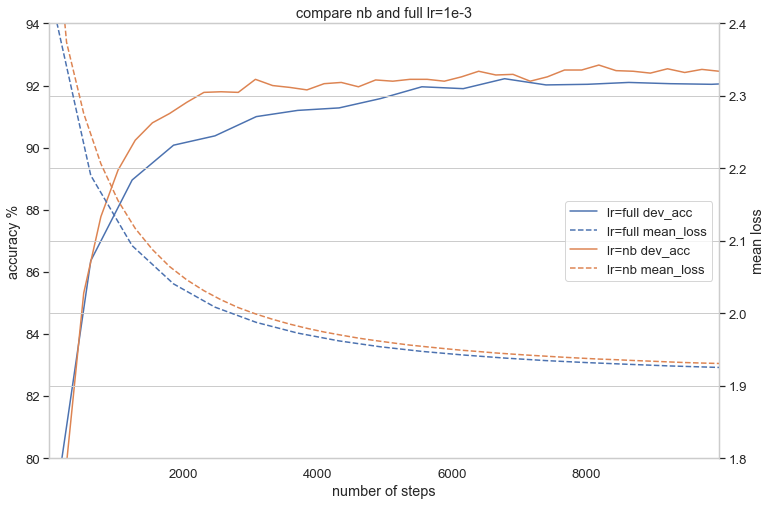

In [10]:
plot_compare_dev_loss_niter(all_logs['full'][1e-3], all_logs['nb'][1e-3], "full", "nb", "compare nb and full lr=1e-3", savedir="figures/run_perstep_40ep.jpg")

In [11]:
log_120ep = load_log("imdb_runs_results/imdb_log_full_1e-04_120epoch.txt")
log_120ep_nb = load_log("imdb_runs_results/imdb_log_nb_1e-04_120epoch.txt")
log_120ep["type"] = "full"
log_120ep_nb["type"] = "nb"
log2 = pd.concat([log_120ep, log_120ep_nb])
log2["nsteps"] = log2.epoch * log2.mean_ngram_count
log2.head()

,epoch,mean_dv_norm,mean_grad_norm,mean_ngram_count,mean_loss,C,dev_acc,test_acc,type,nsteps
0,0.0,0.126082,41.241552,617.0,2.303244,100.0,89.22,89.712,full,0.0
1,1.0,0.145193,28.548315,617.0,2.053725,20.0,91.10,91.404,full,617.0
2,2.0,0.158437,25.144390,617.0,2.000136,100.0,91.34,91.964,full,1234.0
3,3.0,0.168873,23.171853,617.0,1.976925,20.0,91.74,92.188,full,1851.0
4,4.0,0.177607,21.806372,617.0,1.963603,10.0,91.84,92.064,full,2468.0


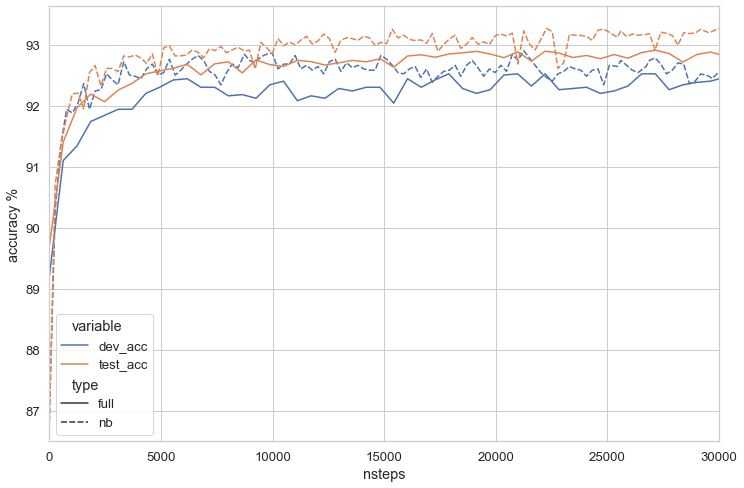

In [12]:
f, ax = plt.subplots(figsize=(12, 8))
g = sns.lineplot(y="value", x="nsteps", style="type", hue="variable", ax=ax,
    data=pd.melt(log2, id_vars=["nsteps", "type"], value_vars=["dev_acc", "test_acc"]))
ax.set(xlim=(0, 30000))
ax.set_ylabel("accuracy %")
f.savefig("figures/run_perstep_120ep.jpg")

In [13]:
# last epoch
log2.loc[log2.epoch==119]

,epoch,mean_dv_norm,mean_grad_norm,mean_ngram_count,mean_loss,C,dev_acc,test_acc,type,nsteps
119,119.0,0.381643,9.712060,617.0,1.897381,10.0,92.34,92.956,full,73423.0
119,119.0,0.306033,12.027172,256.0,1.910615,20.0,92.46,93.296,nb,30464.0


In [14]:
# compare mean ngram count
log2.pivot_table(values="mean_ngram_count", index="type", aggfunc=np.mean)

,mean_ngram_count
type,
full,617.000000
nb,256.033333
